2025-11-04 05:39:32.664483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762234772.837979      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762234772.896335      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Dataset downloaded at: /kaggle/input/brain-tumor-mri-dataset
Loading image paths...
Training samples: 5712 | Testing samples: 1311


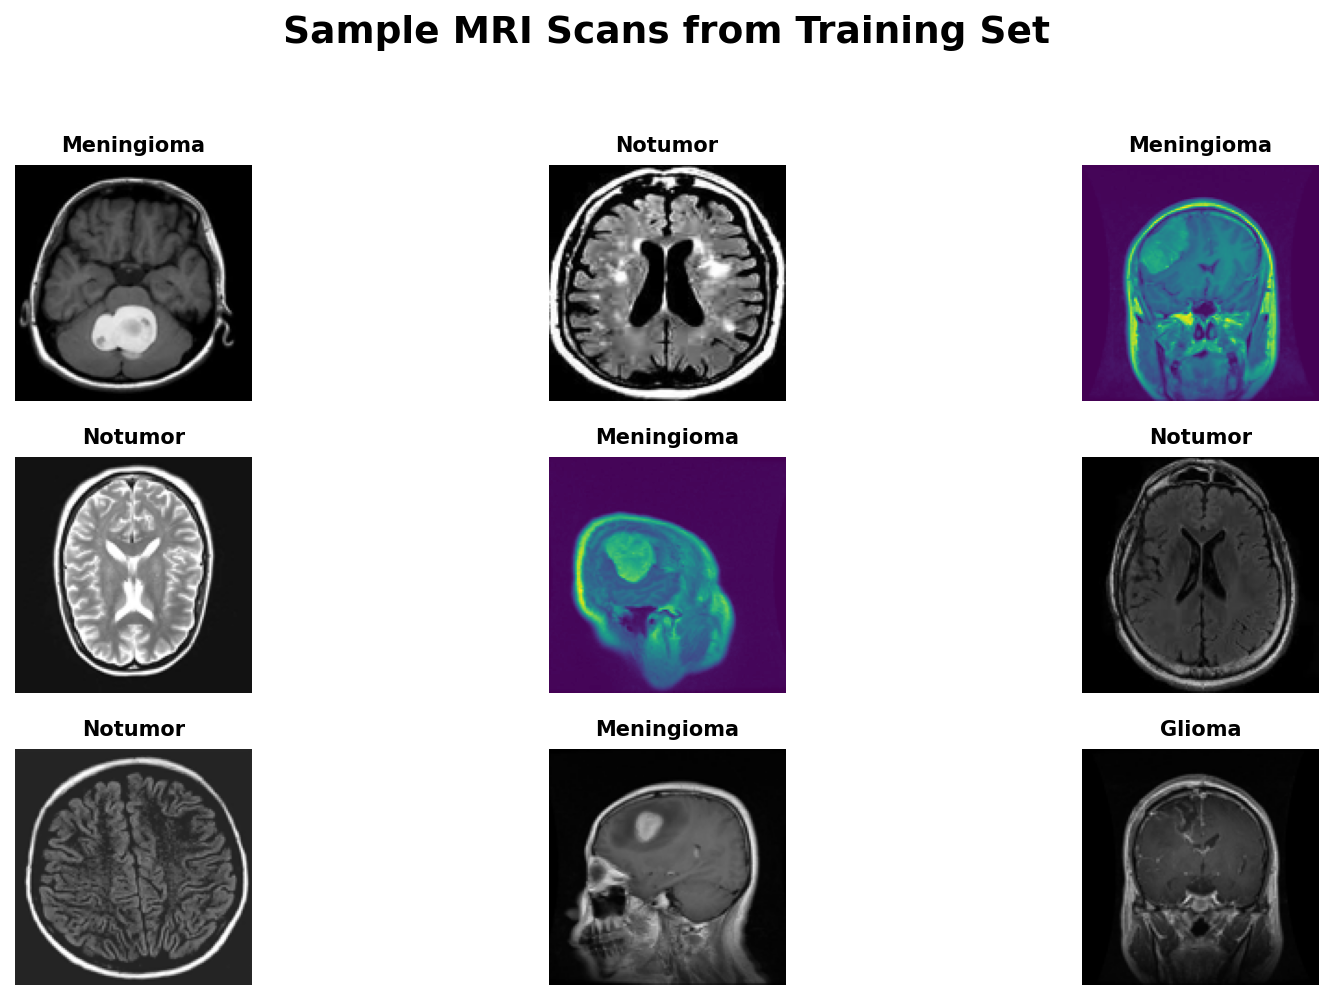

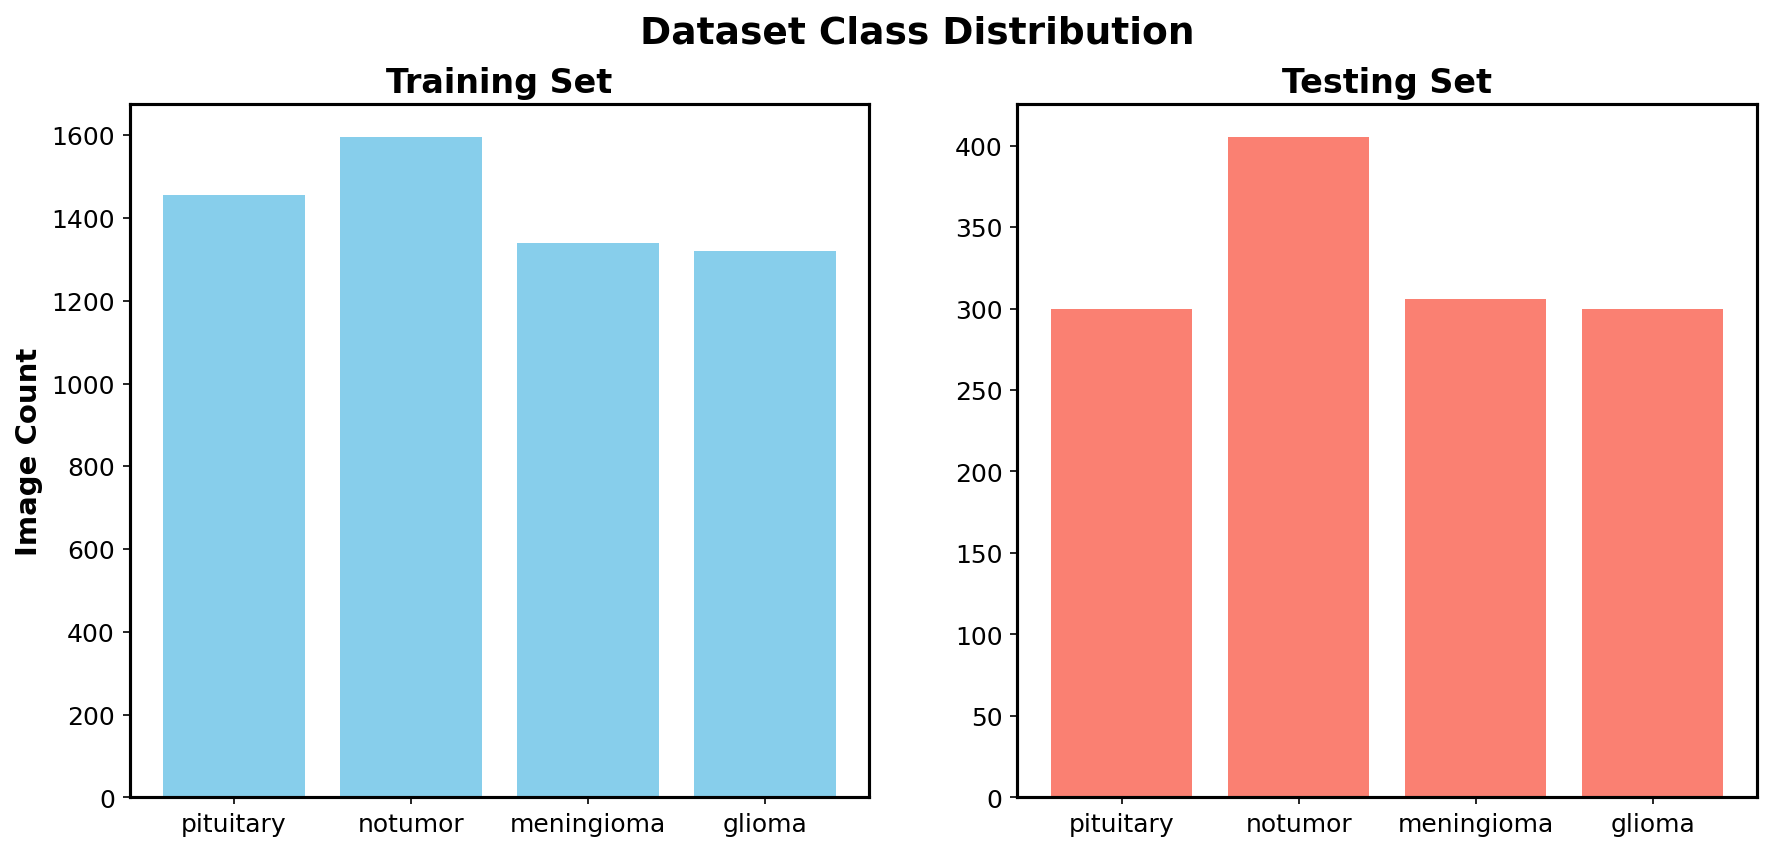

Building the VGG16-based CNN model...


I0000 00:00:1762234785.656835      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,068 (56.64 MB)

 Trainable params: 7,212,292 (27.51 MB)

 Non-trainable params: 7,635,776 (29.13 MB)

Epoch 1/25


I0000 00:00:1762234791.634705      84 service.cc:148] XLA service 0x7e26e0005d70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762234791.635489      84 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762234792.119912      84 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/178 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.3047 - loss: 2.3354 

I0000 00:00:1762234801.799349      84 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


178/178 ━━━━━━━━━━━━━━━━━━━━ 93s 447ms/step - accuracy: 0.5672 - loss: 1.1531 - val_accuracy: 0.8430 - val_loss: 0.4580 - learning_rate: 1.0000e-04
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 44s 215ms/step - accuracy: 0.8721 - loss: 0.3615 - val_accuracy: 0.8898 - val_loss: 0.2878 - learning_rate: 1.0000e-04
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 38s 214ms/step - accuracy: 0.9239 - loss: 0.2093 - val_accuracy: 0.9281 - val_loss: 0.2092 - learning_rate: 1.0000e-04
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.9421 - loss: 0.1673 - val_accuracy: 0.9296 - val_loss: 0.2110 - learning_rate: 1.0000e-04
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 35s 199ms/step - accuracy: 0.9570 - loss: 0.1209 - val_accuracy: 0.9031 - val_loss: 0.2918 - learning_rate: 1.0000e-04
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 34s 189ms/step - accuracy: 0.9706 - loss: 0.0882 - val_accuracy: 0.9515 - val_loss: 0.1465 - learning_rate: 1.0000e-04
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 32s 181ms/step - 

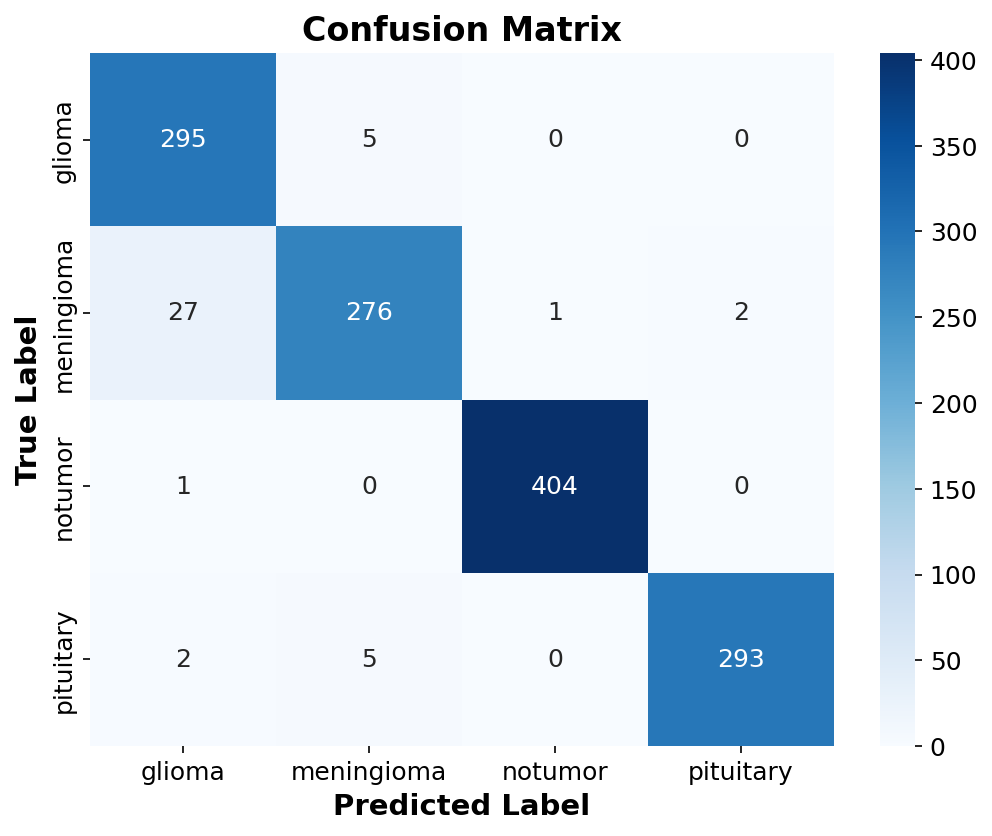


Testing on one MRI image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step


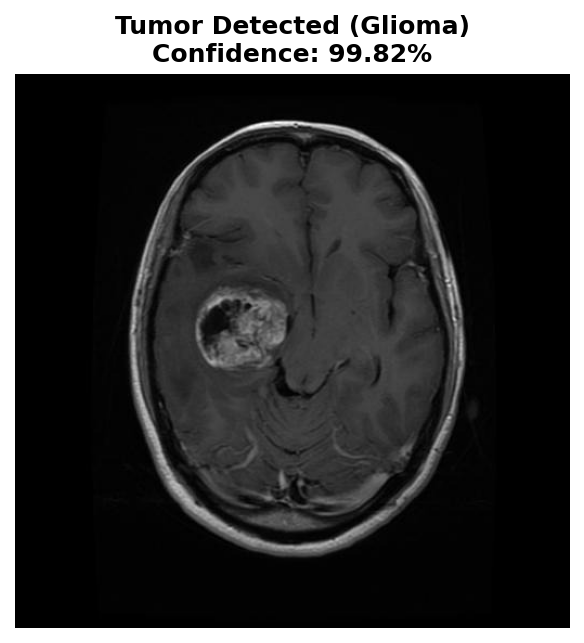

In [1]:
# ===========================================================
# Brain Tumor Detection using VGG16 (Transfer Learning)
# ===========================================================

import os
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import kagglehub

warnings.filterwarnings('ignore')

# -----------------------------
# Plot configuration
# -----------------------------
plt.rcParams.update({
    'figure.dpi': 150,
    'savefig.dpi': 600,
    'savefig.format': 'pdf',
    'font.sans-serif': ['Helvetica', 'Arial', 'DejaVu Sans'],
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'axes.linewidth': 1.5,
    'lines.linewidth': 2.0
})

# ===========================================================
# STEP 1: Download Dataset
# ===========================================================
print("Downloading dataset...")
dataset_path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Dataset downloaded at:", dataset_path)

train_dir = os.path.join(dataset_path, 'Training')
test_dir = os.path.join(dataset_path, 'Testing')

# ===========================================================
# STEP 2: Load and Organize Data
# ===========================================================
print("Loading image paths...")

def collect_image_paths(directory):
    paths, labels = [], []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for img in os.listdir(label_path):
                paths.append(os.path.join(label_path, img))
                labels.append(label)
    return paths, labels

train_paths, train_labels = collect_image_paths(train_dir)
test_paths, test_labels = collect_image_paths(test_dir)

train_paths, train_labels = shuffle(train_paths, train_labels, random_state=42)

print(f"Training samples: {len(train_paths)} | Testing samples: {len(test_paths)}")

# ===========================================================
# STEP 3: Visualize Some Images
# ===========================================================
plt.figure(figsize=(12, 7))
plt.suptitle("Sample MRI Scans from Training Set", fontsize=18, fontweight='bold')

for i, idx in enumerate(random.sample(range(len(train_paths)), 9)):
    image = Image.open(train_paths[idx]).resize((128, 128))
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(train_labels[idx].capitalize(), fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ===========================================================
# STEP 4: Class Distribution
# ===========================================================
def get_class_distribution(directory):
    return {cls: len(os.listdir(os.path.join(directory, cls)))
            for cls in os.listdir(directory)
            if os.path.isdir(os.path.join(directory, cls))}

train_counts = get_class_distribution(train_dir)
test_counts = get_class_distribution(test_dir)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Dataset Class Distribution", fontsize=18, fontweight='bold')

axes[0].bar(train_counts.keys(), train_counts.values(), color="skyblue")
axes[0].set_title("Training Set")
axes[0].set_ylabel("Image Count")

axes[1].bar(test_counts.keys(), test_counts.values(), color="salmon")
axes[1].set_title("Testing Set")

plt.show()

# ===========================================================
# STEP 5: Data Preprocessing
# ===========================================================
IMAGE_SIZE = 224

def augment_image(image):
    """Apply simple brightness and contrast augmentations."""
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.85, 1.15))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.85, 1.15))
    return np.array(image) / 255.0

def load_images(paths):
    images = []
    for path in paths:
        img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        img = img_to_array(img)
        img = augment_image(img)
        images.append(img)
    return np.array(images)

def encode_labels(labels):
    classes = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
    return np.array([classes.index(label) for label in labels])

def data_generator(paths, labels, batch_size=12):
    """Yield batches of augmented images and encoded labels."""
    while True:
        paths, labels = shuffle(paths, labels)
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i+batch_size]
            batch_images = load_images(batch_paths)
            batch_labels = encode_labels(labels[i:i+batch_size])
            yield batch_images, batch_labels

# ===========================================================
# STEP 6: Build the Model (VGG16 + Custom Head)
# ===========================================================
print("Building the VGG16-based CNN model...")

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Freeze all layers except last 4
for layer in base_model.layers[:-4]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(os.listdir(train_dir)), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ===========================================================
# STEP 7: Training the Model
# ===========================================================
batch_size = 32
train_steps = len(train_paths) // batch_size
val_steps = len(test_paths) // batch_size

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)
]

history = model.fit(
    data_generator(train_paths, train_labels, batch_size),
    steps_per_epoch=train_steps,
    validation_data=data_generator(test_paths, test_labels, batch_size),
    validation_steps=val_steps,
    epochs=25,
    callbacks=callbacks
)

# ===========================================================
# STEP 8: Model Evaluation
# ===========================================================
print("\nEvaluating model on test data...")

test_images = load_images(test_paths)
test_labels_encoded = encode_labels(test_labels)
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

print("\nClassification Report:\n")
print(classification_report(test_labels_encoded, predicted_classes, target_names=class_names))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_labels_encoded, predicted_classes),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ===========================================================
# STEP 9: Predict a Single MRI Image
# ===========================================================
def detect_tumor(img_path, model, image_size=224):
    """Predict and display the tumor type for a single image."""
    img = load_img(img_path, target_size=(image_size, image_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)
    pred_idx = np.argmax(preds)
    confidence = np.max(preds)
    pred_label = class_names[pred_idx]

    result = ("No Tumor Detected" if pred_label.lower() == 'notumor'
              else f"Tumor Detected ({pred_label.capitalize()})")

    plt.imshow(load_img(img_path))
    plt.axis('off')
    plt.title(f"{result}\nConfidence: {confidence*100:.2f}%", fontsize=12)
    plt.show()

# Example image test
sample_image = os.path.join(test_dir, "glioma", "Te-gl_0028.jpg")
print("\nTesting on one MRI image...")
detect_tumor(sample_image, model)


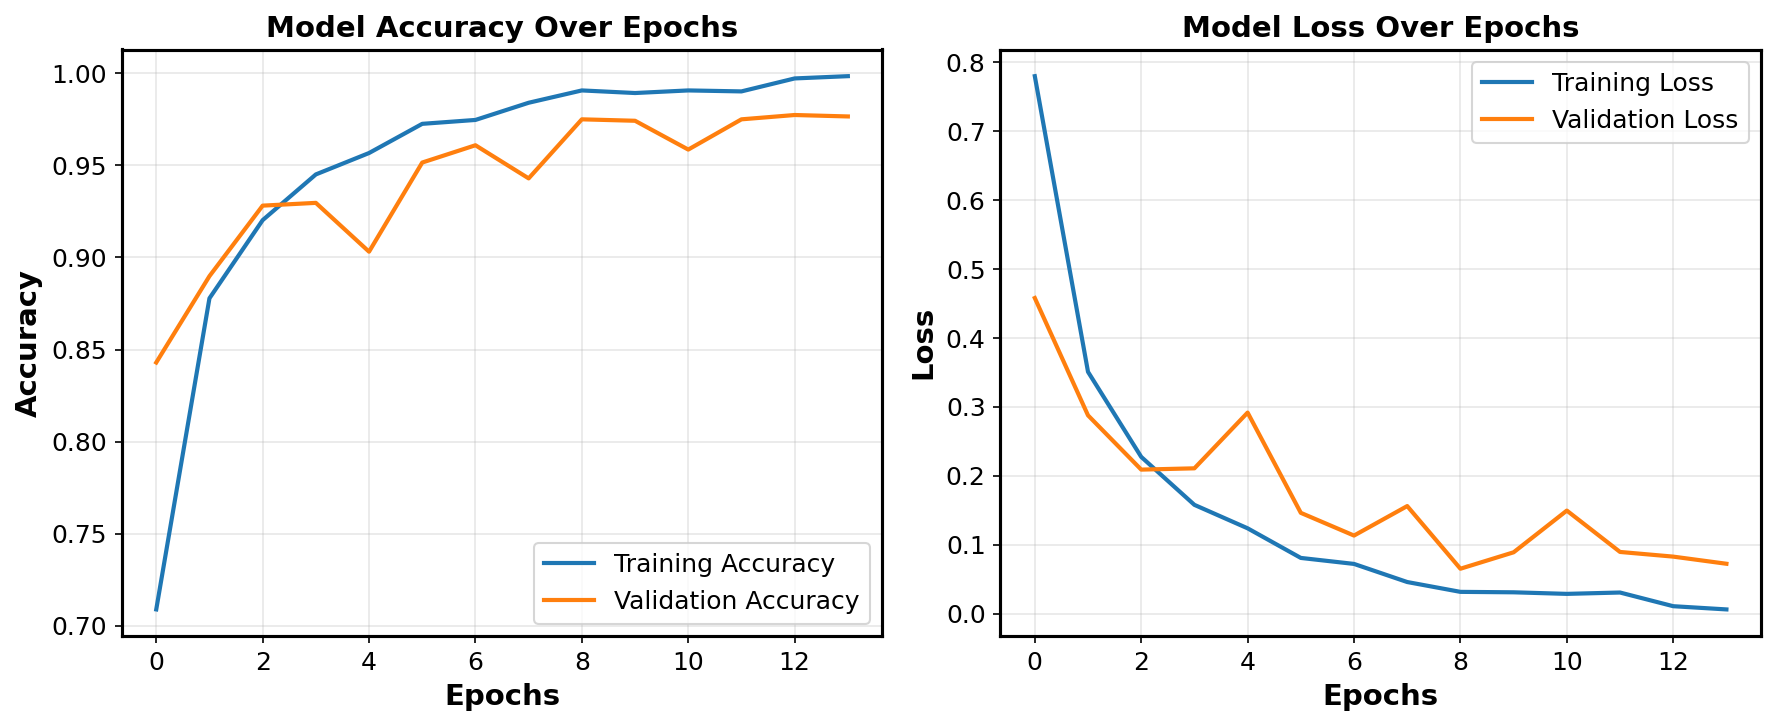

In [2]:
# ===========================================================
# STEP 8.1: Training Performance Visualization
# ===========================================================
plt.figure(figsize=(12, 5))

# --- Accuracy Plot ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)

# --- Loss Plot ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



Classification Report:

              precision    recall  f1-score   support

      glioma       0.91      0.98      0.94       300
  meningioma       0.97      0.90      0.93       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.99      0.98      0.98       300

    accuracy                           0.97      1311
   macro avg       0.97      0.96      0.96      1311
weighted avg       0.97      0.97      0.97      1311



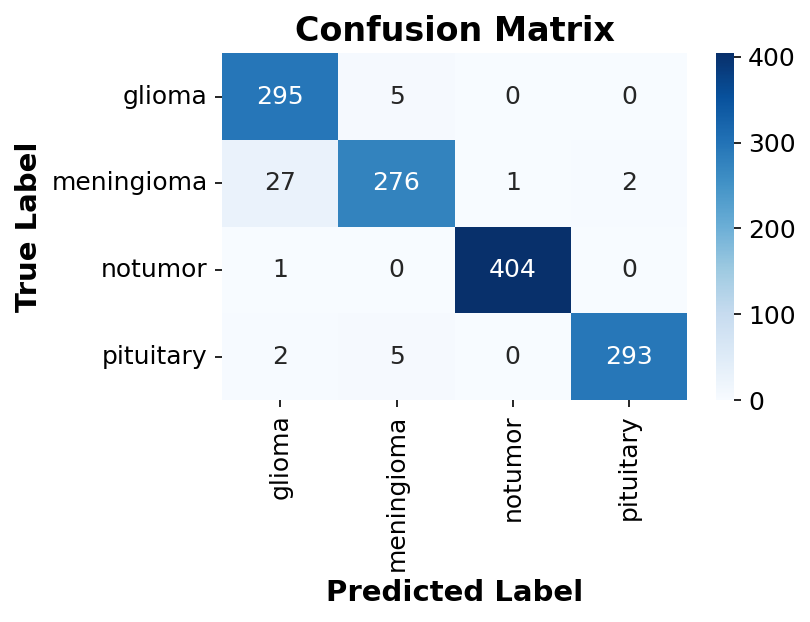

In [7]:
print("\nClassification Report:\n")
print(classification_report(test_labels_encoded, predicted_classes, target_names=class_names))

plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(test_labels_encoded, predicted_classes),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()